### A/B testing

### Problem Statement
- Conduct an A/B testing analysis to evaluate the impact of a change or intervention. Analyze the results using statistical techniques and draw actionable insights.

###### Comparing two groups, "GRP A" and "GRP B", in an A/B test to measure the impact of an intervention or change

#### 1- Define the Hypothesis
- Hypothesis: "Group B has a higher average spend and more purchases than Group A due to the intervention."
#### 2- Identify Metrics:

 - Metrics to compare between Group A and Group B:
    - Average spent per user.
    - Average number of purchases per user.
    - Total revenue.
    - Conversion rate (percentage of users who made a purchase).


In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [60]:
df=pd.read_csv('AB_testing_exercise.csv')
df.head(5)

,uid,country,gender,spent,purchases,date,group,device
0,11115722,MEX,F,1595,5,2016-03-08,GRP B,I
1,11122053,USA,M,498,2,2017-07-14,GRP B,I
2,11128688,USA,F,2394,6,2017-09-17,GRP A,I
3,11130578,USA,F,1197,3,2017-11-30,GRP A,I
4,11130759,ESP,M,1297,3,2018-01-10,GRP B,A


In [24]:
df.shape

(45883, 7)

In [5]:
df.tail(5)

,uid,country,gender,spent,purchases,date,group,device
45878,99994149,DEU,F,1897,3,2017-02-05,GRP B,I
45879,99995092,USA,F,899,1,2017-08-18,GRP B,A
45880,99996986,BRA,M,2194,6,2014-12-06,GRP B,A
45881,99997035,USA,M,2196,4,2017-04-05,GRP A,I
45882,99999383,GBR,F,899,1,2017-09-04,GRP B,I


In [6]:
df.sample(5)

,uid,country,gender,spent,purchases,date,group,device
45325,98947487,USA,M,996,4,2016-06-13,GRP A,I
33182,75129289,BRA,M,798,2,2015-07-08,GRP A,I
14500,39103116,GBR,M,499,1,2016-02-13,GRP A,A
3954,18802687,USA,F,2992,8,2017-12-17,GRP B,I
41734,91950823,USA,F,1297,3,2017-09-09,GRP B,A


In [7]:
df.columns


Index(['uid', 'country', 'gender', 'spent', 'purchases', 'date', 'group',
       'device'],
      dtype='object')

In [8]:
df.dtypes

uid           int64
country      object
gender       object
spent         int64
purchases     int64
date         object
group        object
device       object
dtype: object

### Preparing Data
#### Data Cleaning

In [9]:
df.isnull().sum()

uid          0
country      0
gender       0
spent        0
purchases    0
date         0
group        0
device       0
dtype: int64

In [13]:
df.duplicated(subset='uid').sum()

0

###### Change the dattype of Date (object to Datetime)

In [14]:
df['date']=pd.to_datetime(df['date'])

In [15]:
df['date'].dtype

dtype('<M8[ns]')

In [16]:
df.dtypes

uid                   int64
country              object
gender               object
spent                 int64
purchases             int64
date         datetime64[ns]
group                object
device               object
dtype: object

In [19]:
# Drop uid 
df.drop(['uid'],inplace=True,axis=1)

In [20]:
df

,country,gender,spent,purchases,date,group,device
0,MEX,F,1595,5,2016-03-08,GRP B,I
1,USA,M,498,2,2017-07-14,GRP B,I
2,USA,F,2394,6,2017-09-17,GRP A,I
3,USA,F,1197,3,2017-11-30,GRP A,I
4,ESP,M,1297,3,2018-01-10,GRP B,A
...,...,...,...,...,...,...,...
45878,DEU,F,1897,3,2017-02-05,GRP B,I
45879,USA,F,899,1,2017-08-18,GRP B,A
45880,BRA,M,2194,6,2014-12-06,GRP B,A
45881,USA,M,2196,4,2017-04-05,GRP A,I


In [21]:
df['group'].unique()

array(['GRP B', 'GRP A'], dtype=object)

In [22]:
df['gender'].unique()

array(['F', 'M'], dtype=object)

In [23]:
df['device'].unique()

array(['I', 'A'], dtype=object)

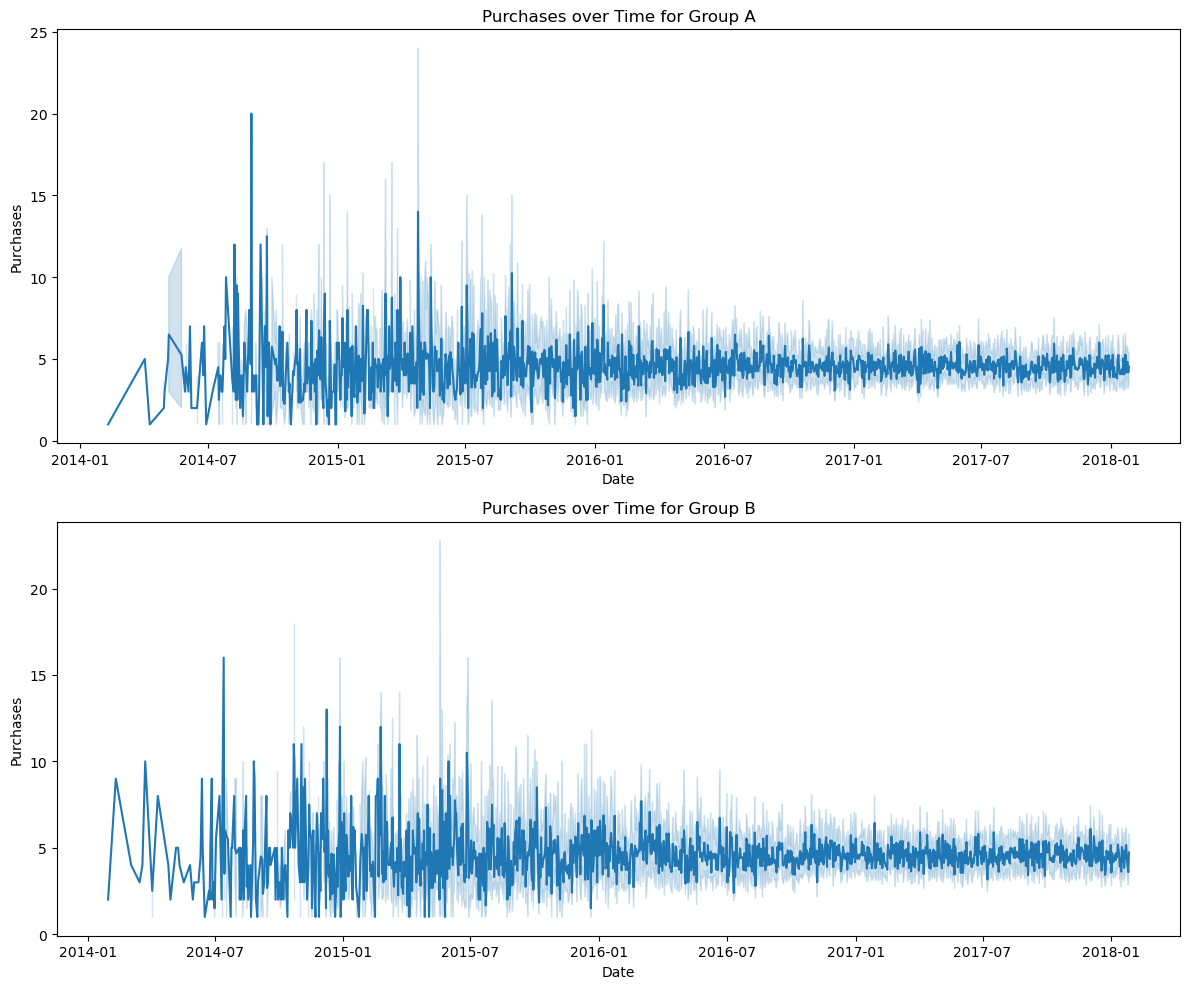

In [25]:
df_grp_a = df[df['group'] == 'GRP A']
df_grp_b = df[df['group'] == 'GRP B']

# Set up the figure and axes for plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Plot for Group A
sns.lineplot(x='date', y='purchases', data=df_grp_a, ax=ax1)
ax1.set_title('Purchases over Time for Group A')
ax1.set_xlabel('Date')
ax1.set_ylabel('Purchases')

# Plot for Group B
sns.lineplot(x='date', y='purchases', data=df_grp_b, ax=ax2)
ax2.set_title('Purchases over Time for Group B')
ax2.set_xlabel('Date')
ax2.set_ylabel('Purchases')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [26]:
df_categorical = df.select_dtypes(include=['object'])

print(df_categorical.columns)

Index(['country', 'gender', 'group', 'device'], dtype='object')


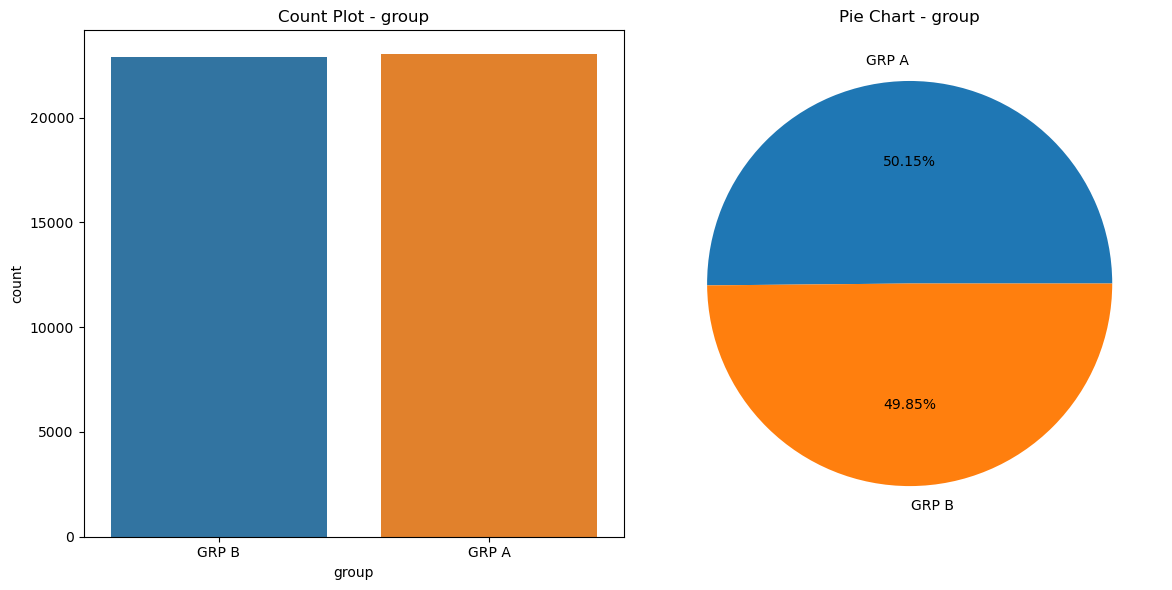

In [33]:
var = 'group'

plt.figure(figsize=(12, 6))

# Count plot
plt.subplot(1, 2, 1)
sns.countplot(x=var, data=df_categorical)
plt.title(f'Count Plot - {var}')

# Pie chart
plt.subplot(1, 2, 2)
count = df[var].value_counts()
plt.pie(count, labels=count.index, autopct='%0.2f%%')
plt.title(f'Pie Chart - {var}')

plt.tight_layout()
plt.show()

In [35]:
df_grp_a.value_counts().sum()

23009

In [37]:
df_grp_b.value_counts().sum()

22874

In [38]:
df.describe()

,spent,purchases,date
count,45883.000000,45883.000000,45883
mean,1883.453349,4.544385,2017-01-13 21:08:38.544995072
min,99.000000,1.000000,2014-01-30 00:00:00
25%,897.000000,2.000000,2016-08-13 00:00:00
50%,1596.000000,4.000000,2017-02-26 00:00:00
75%,2593.000000,6.000000,2017-08-13 00:00:00
max,12170.000000,30.000000,2018-01-26 00:00:00
std,1363.921546,3.102454,NaN


In [39]:
df['date'].dtype

dtype('<M8[ns]')

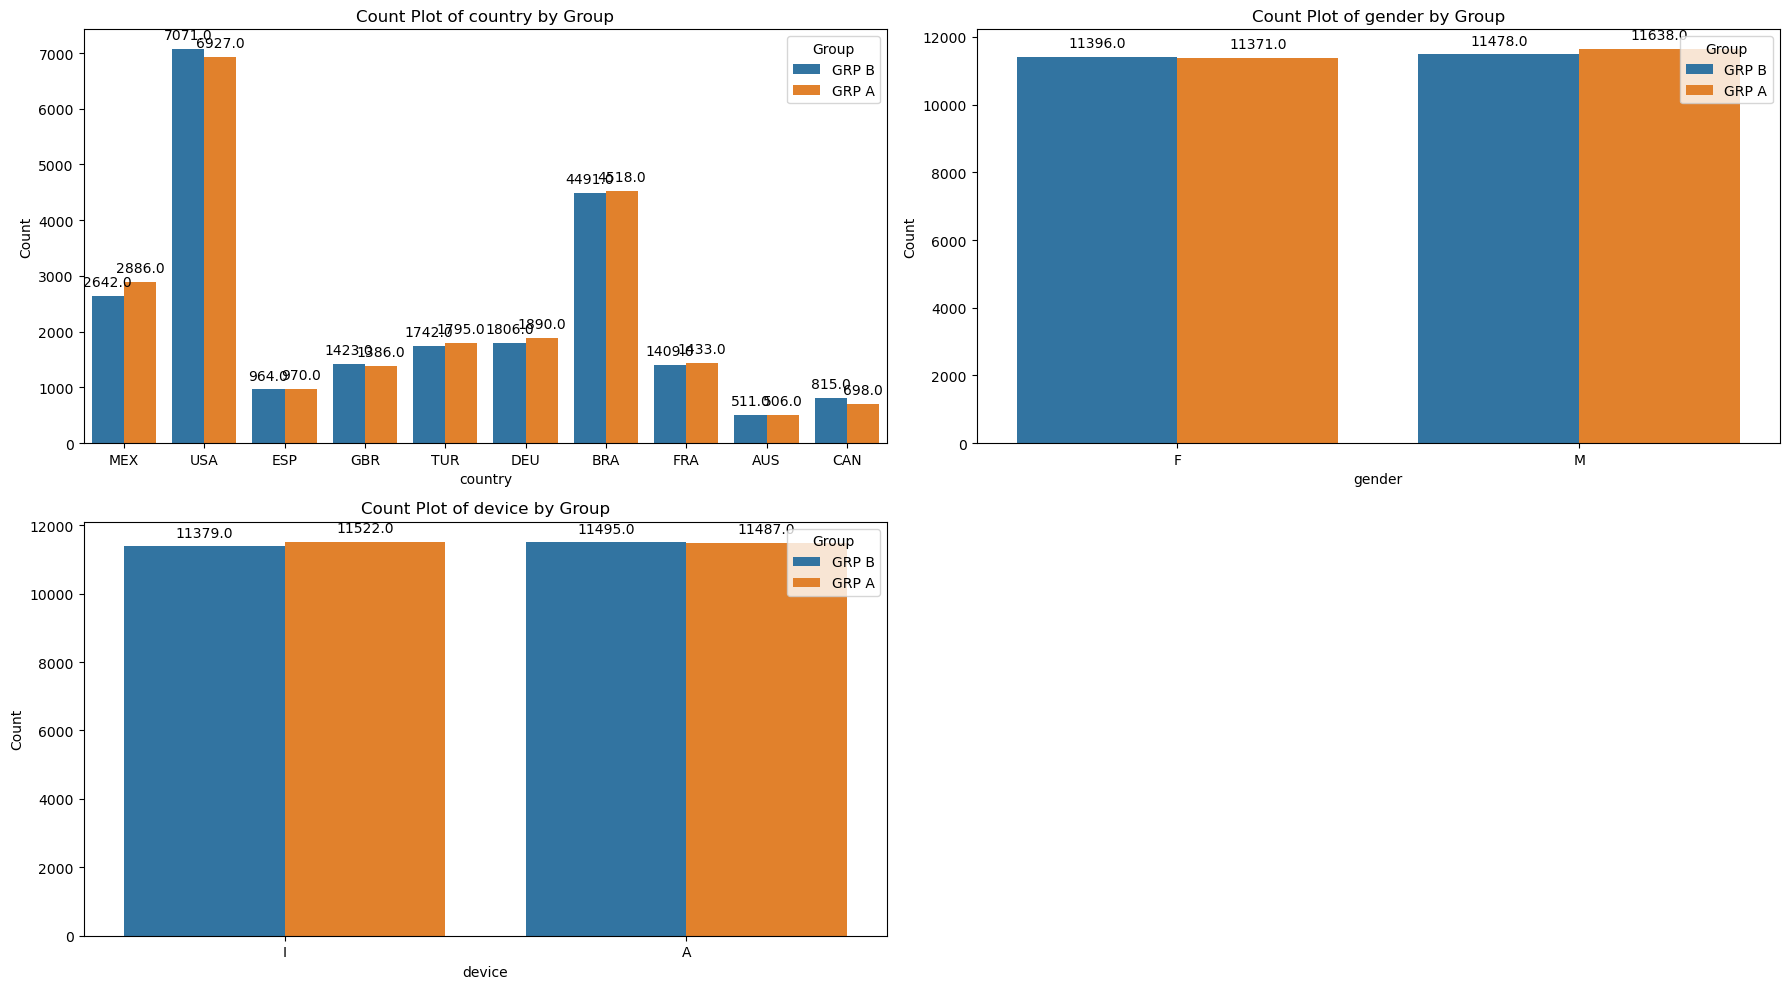

In [48]:

# Set up the figure
plt.figure(figsize=(18, 10))

# Iterate through each categorical column
for i, col in enumerate(['country', 'gender', 'device']):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=col, hue='group', data=df)
    plt.title(f'Count Plot of {col} by Group')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='Group')
    
    # Add annotations (counts) on top of each bar
    for p in plt.gca().patches:
        plt.gca().annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()), 
                           ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()


##### Average spent per user

In [55]:
average_spent = df.groupby('group')['spent'].mean()
print("Average spent per user:")
print(average_spent)

Average spent per user:
group
GRP A    1880.504281
GRP B    1886.419822
Name: spent, dtype: float64


##### Average purchases per user

In [56]:
average_purchases = df.groupby('group')['purchases'].mean()
print("Average number of purchases per user:")
print(average_purchases)

Average number of purchases per user:
group
GRP A    4.536355
GRP B    4.552461
Name: purchases, dtype: float64


In [57]:
total_revenue = df.groupby('group')['spent'].sum()
print("Total revenue:")
print(total_revenue)

Total revenue:
group
GRP A    43268523
GRP B    43149967
Name: spent, dtype: int64


In [58]:
conversion_rate = df.groupby('group')['purchases'].apply(lambda x: (x > 0).mean() * 100)
print("Conversion rate (percentage of users who made a purchase):")
print(conversion_rate)

Conversion rate (percentage of users who made a purchase):
group
GRP A    100.0
GRP B    100.0
Name: purchases, dtype: float64


In [49]:
# For categorical variables

In [41]:
from scipy.stats import chi2_contingency

# Iterate through each categorical column
for col in ['country', 'gender', 'device']:
    contingency_table = pd.crosstab(df[col], df['group'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-square test for {col}:")
    print(f"  Chi-square statistic: {chi2}")
    print(f"  p-value: {p}")
    # if p-value is less than 0.05 then signficant diffenrce
    if p < 0.05:
        print("  There is a significant difference between groups.")
    else:
        print("  There is no significant difference between groups.")
    print()


Chi-square test for country:
  Chi-square statistic: 24.419264654234592
  p-value: 0.003685431573251962
  There is a significant difference between groups.

Chi-square test for gender:
  Chi-square statistic: 0.7217581596932088
  p-value: 0.39556780579719464
  There is no significant difference between groups.

Chi-square test for device:
  Chi-square statistic: 0.4854159370736633
  p-value: 0.48597930727369876
  There is no significant difference between groups.



In [50]:
from scipy import stats

# Example: Independent t-test for 'spent' between 'group A' and 'group B'
group_A_spent = df[df['group'] == 'GRP A']['spent']
group_B_spent = df[df['group'] == 'GRP B']['spent']

t_statistic, p_value = stats.ttest_ind(group_A_spent, group_B_spent)
print(f"Independent t-test for 'spent' between Group A and Group B:")
print(f"  t-statistic: {t_statistic}")
print(f"  p-value: {p_value}")
if p_value < 0.05:
    print("  There is a significant difference in 'spent' between groups A and B.")
else:
    print("  There is no significant difference in 'spent' between groups A and B.")


Independent t-test for 'spent' between Group A and Group B:
  t-statistic: -0.4645103256286329
  p-value: 0.6422843675437144
  There is no significant difference in 'spent' between groups A and B.


In [54]:
group_A_purchase = df[df['group'] == 'GRP A']['purchases']
group_B_purchase = df[df['group'] == 'GRP B']['purchases']

t_statistic, p_value = stats.ttest_ind(group_A_purchase, group_B_purchase)
print(f"Independent t-test for 'purchases' between Group A and Group B:")
print(f"  t-statistic: {t_statistic}")
print(f"  p-value: {p_value}")
if p_value < 0.05:
    print("  There is a significant difference in 'purchase' between groups A and B.")
else:
    print("  There is no significant difference in 'purchase' between groups A and B.")


Independent t-test for 'purchases' between Group A and Group B:
  t-statistic: -0.5559968336392416
  p-value: 0.5782157306278457
  There is no significant difference in 'purchase' between groups A and B.


### Conclusion: Impact Analysis of Change in Group (A & B)

- Hypothesis posited that implementing Group B as a change from Group A would lead to increased spending and purchases. To evaluate this hypothesis, we conducted t-tests and chi-square tests across key metrics, including spending and purchase behavior.

- The results of these statistical analyses consistently indicated **no significant difference between Group A and Group B in terms of spending and purchases**. Specifically, both the t-tests and chi-square tests failed to reject the null hypothesis, suggesting that the observed differences in spending and purchase behaviors between the groups were not statistically significant.

- Given these findings, we conclude that the change from Group A to Group B did not yield the anticipated result increase in spending or purchases. Therefore, maintaining Group A appears to be the more effective strategy based on the analyzed metrics.

